# Лабораторная работа №2  Швердяков Михаил А-06-21 Вар 13
## Решение нелинейных уравнений
### Задача 1

#### Задача 1. Локализуйте максимальный вещественный корень уравнения $f(x) = 0$ где $f(x)=-1.8x^3-3.5x^2+1.2x+3$ и найдите его
#### точностью $\varepsilon$ , используя средства языка Python

1. Постройте график заданной функции, используя средства библиотеки matplotlib. По
 графику определить отрезок локализации и начальное приближение для искомого корня. 

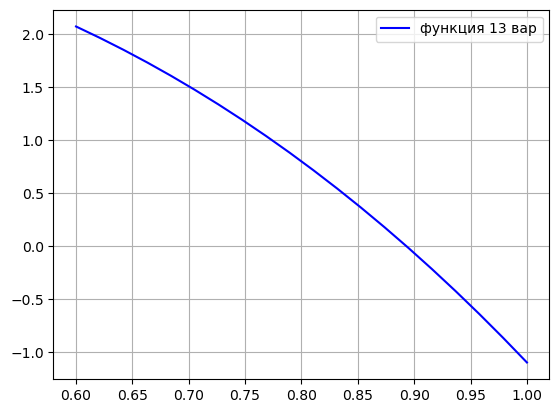

In [83]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return -1.8*x**3-3.5*x**2+1.2*x+3.0
def df(x):
    return -1.8*3*x**2-3.5*2*x+1.2

A = 0.6
B = 1.0

x = np.linspace(A, B, 20)
plt.grid(True)
plt.plot(x, f(x), color='blue', label='функция 13 вар')
plt.legend()
plt.savefig('график функц лаб 2.png', dpi=500)

отрезки локалзации (-2.0, -1.5) (-1.25, -0.75) (0.6, 1.0)
самый большой соответственно (0.6, 1.0)

2. Найдите корень, используя библиотечную функцию scipy.optimize.newton().

In [84]:
from scipy.optimize import newton

x0 = (A + B) / 2
res1 = newton(f, x0, tol=1e-6, full_output=True)
print('метод секущих:\n', res1)

метод секущих:
 (0.892862012390406,       converged: True
           flag: 'converged'
 function_calls: 6
     iterations: 5
           root: 0.892862012390406)


3. Найдите тот же корень, используя библиотечную функцию scipy.optimize.newton() с
передаваемой в нее производной. Проконтролируйте совпадение результатов.

In [85]:
res2 = newton(f, x0, tol=1e-6, full_output=True, fprime=df)
print('метод Ньютона:\n', res2)

метод Ньютона:
 (0.8928620123904273,       converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 4
           root: 0.8928620123904273)


#### Задача 2. 
Даны два уравнения $f(x)=x^4-7x^2+10=0$ и $g(x)=x^4-4x^2+4=0$. Найдите с точностью $\varepsilon=10^{-10}$ все их корни,
содержащиеся на отрезке $[a, b]$. Для решения задачи реализуйте программно метод бисекции. 

1. Найти аналитическое решение уравнения $f(x)=x^4-7x^2+10=0$.
$$x_1 = -\sqrt5, x_2 = -\sqrt2, x_3 = \sqrt2, x_4 = \sqrt5$$

2. Составить программу для нахождения корня с заданной точностью методом бисекции, с ее
помощью найти корни уравнения с заданной точностью.

In [86]:
def f2(x):
    return x**4-7*x**2+10

#x = np.linspace(0, 3, 20)
#plt.grid(True)
#plt.plot(x, f2(x), color='blue', label='функция 13 вар')

a = 0
b = 3
m = (a + b) / 2
eps = 1e-10

while (b - a) > 2 * eps:
    if f2(a) * f2(m) < 0:
        b = m
    else:
        a = m
    m = (a + b) / 2

print('корень методом бисекции', m) # корни f(x) корень из 2 и корень из 5

корень методом бисекции 1.4142135622969363


4. Используя библиотечную функцию scipy.optimize.root()., найти корни уравнения $f(x)=x^4-7x^2+10=0$ с
заданной точностью. Сравнить полученные результаты.

In [87]:
from scipy.optimize import root

x = np.linspace(0, 3, 20)
x0 = 1.5
Q = root(f2, x0)
x_res = Q.x[0]

print('%0.9f' %x_res, ' :" ', "%0.9f" %f(x_res))
print("%0.9e" %x_res, ' :" ', "%0.9e" %f(x_res))

1.414213562  :"  -7.394112550
1.414213562e+00  :"  -7.394112550e+00


результаты метода бисекции и библиотечной функции одинаковые

5. Аналогично п. 1-4 попытаться найти корни уравнения $g(x)=x^4-4x^2+4=0$. Объяснить причины
расхождения результатов для двух функций.

корень методом бисекции 2.9999999999126885


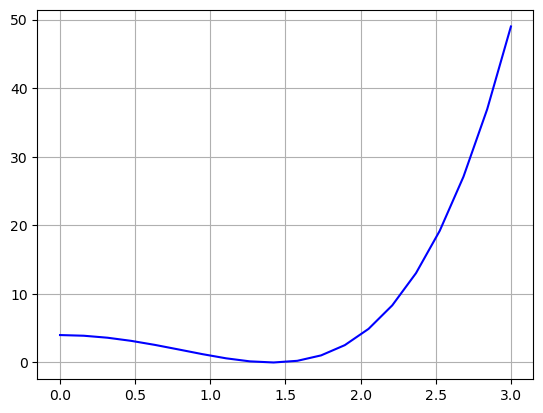

In [88]:
def g(x):
    return x**4-4*x**2+4

x = np.linspace(0, 3, 20)
plt.grid(True)
plt.plot(x, g(x), color='blue', label='функция 13 вар')

a = 0
b = 3
m = (a + b) / 2
eps = 1e-10

while (b - a) > 2 * eps:
    if g(a) * g(m) < 0:
        b = m
    else:
        a = m
    m = (a + b) / 2

print('корень методом бисекции', m) # корни f(x) корень из 2 и корень из 5

In [89]:
#x = np.linspace(0, 3, 20)
x0 = 1.5
Q = root(g, x0)
x_res = Q.x[0]

print('%0.9f' %x_res, ' :" ', "%0.9f" %f(x_res))
print("%0.9e" %x_res, ' :" ', "%0.9e" %f(x_res))

1.414213566  :"  -7.394112619
1.414213566e+00  :"  -7.394112619e+00


Мы видим по графику что корень функции $g(x)=x^4-4x^2+4=0$ на данном отрезке локализации чётной кратности. А метод бисекции не работает с такими корнями, так как смены знака не происходит

#### Задача 3.
Методом простой итерации найти все вещественные корни уравнения из задачи 1
точностью $\varepsilon = 10^{-13}$. Проследить за поведением погрешности.


1. Локализовать все вещественные корни заданного уравнения.

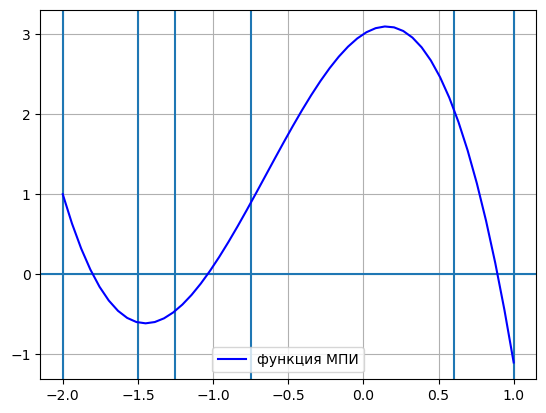

In [90]:
a, b = -2.0, -1.5
x = np.linspace(-2.0, 1.0, 50) #отр лок (-2.0, -1.5) (-1.25, -0.75) (0.6, 1.0)

ax = plt.gca()
ax.axvline(x=-2.0)
ax.axvline(x=-1.5)
ax.axvline(x=-1.25)
ax.axvline(x=-0.75)
ax.axvline(x=0.6)
ax.axvline(x=1.0)
ax.axhline(y=0)

plt.grid(True)
plt.plot(x, f(x), color='blue', label='функция МПИ')
plt.legend()
plt.savefig('график функц МПИ.png', dpi=500)

как видно из графика отрезки локализации (-2.0, -1.5) (-1.25, -0.75) (0.6, 1.0)

2. По графику производной или путем ее табулирования найти диапазон изменения ее
значений на очередном отрезке локализации

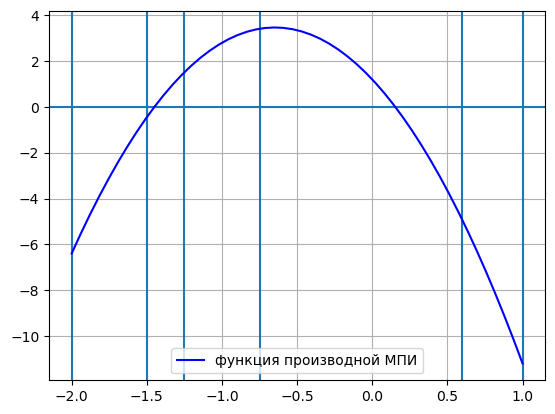

In [91]:
#x = np.linspace(-10.6, 11.0, 20)
ax = plt.gca()
ax.axvline(x=-2.0)
ax.axvline(x=-1.5)
ax.axvline(x=-1.25)
ax.axvline(x=-0.75)
ax.axvline(x=0.6)
ax.axvline(x=1.0)
ax.axhline(y=0)

plt.grid(True)
plt.plot(x, df(x), color='blue', label='функция производной МПИ')
plt.legend()
plt.savefig('график функц произв МПИ.png', dpi=500)

3. Построить расчетные формулы метода простой итерации с оптимальным параметром
4. Составить программу для нахождения корня с заданной точностью методом простой
итерации с оптимальным параметром (предусмотреть возможность вывода промежуточной
информации о расчетах). 

In [92]:
import pandas as pd

def fix_point(a, b, df):
    results = []
    
    m = df(a)
    M = df(b)
    alfa = 2 / (m + M)
    q = (M - m) / (M + m)
    eps = 1e-13

    xn1 = (a + b) / 2
    xn = 0
    while abs(xn1 - xn) > ((1 - q) * eps) /q:
        tol = abs(xn1 - xn)
        
        xn = xn1
        xn1 = xn - alfa * f(xn)
        
        results.append([xn, (q / (1.0 - q))*abs(xn1 - xn), tol / abs(xn1 - xn)])
    return results

#отр лок (-2.0, -1.5) (-1.25, -0.75) (0.6, 1.0)
pd.set_option('display.precision', 16)
results = fix_point(-1.5, -2.0, df)
data_frame = pd.DataFrame(results, columns = ['приближение', 'апостериорная оценка', 'скорость убывания погрешности'])
print(data_frame, '\n')
results = fix_point(-1.25, -0.75, df)
data_frame = pd.DataFrame(results, columns = ['приближение', 'апостериорная оценка', 'скорость убывания погрешности'])
print(data_frame, '\n')
results = fix_point(0.6, 1.0, df)
data_frame = pd.DataFrame(results, columns = ['приближение', 'апостериорная оценка', 'скорость убывания погрешности'])
print(data_frame)


           приближение  апостериорная оценка  скорость убывания погрешности
0  -1.7500000000000000    0.3317619626926209            34.8727272727271114
1  -1.8001824817518250    0.0033303405838360            99.6180283490663356
2  -1.8006862307476994    0.0002687653157040            12.3912588017990632
3  -1.8006455771705341    0.0000219160451415            12.2634040023574009
4  -1.8006488922025723    0.0000017856224900            12.2736162118921879
5  -1.8006486221084141    0.0000001454945066            12.2727828794310589
6  -1.8006486441159866    0.0000000118549889            12.2728505363605933
7  -1.8006486423227950    0.0000000009659495            12.2728864276368075
8  -1.8006486424689050    0.0000000000787004            12.2737633365664411
9  -1.8006486424570007    0.0000000000064106            12.2766201053354713
10 -1.8006486424579704    0.0000000000005226            12.2668539325842705
11 -1.8006486424578914    0.0000000000000426            12.2758620689655178 

          

6. Проанализировать полученные результаты.
* ###### 1. На какой итерации достигается точность $\varepsilon = 10^{-13}$ (для каждого корня)?      
точность для 1-го корня достигается на 11 итерации, для 2-го тоже, для 3-го на 15 итерации
* ###### 2. Сравнить скорость работы методов (по количеству итераций) для разных корней.        
для первых двух корней скорость одинаковая, самый правый занимает больше времени
* ###### 3. Определить практически скорость убывания погрешности для каждого из корней 
* ###### 4. Объяснить причину, по которой поиск различных корней происходит с различной скоростью сходимости (если таковое наблюдается).      
    Зависит от отрезка локализации и максимума модуля q